## Library and Data loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

df=pd.read_csv(r"C:\Users\Stefan\Documents\Python\Projects\Threads, an Instagram app Reviews\data\threads_reviews.csv")

sns.set(style="darkgrid")
plt.style.use("dark_background")



## Exploratory Data analysis

In [2]:
#Taking a look at dataset shape
print(df.shape)
df.head()

(32910, 4)


,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,32910.0,3.398481,1.75148,1.0,1.0,4.0,5.0,5.0


In [4]:
#Checking for unique and missing values in dataset
unique_values = df.nunique()
missing_values = df.isnull().sum()

pd.DataFrame({'Unique Values': unique_values, 'Missing Values': missing_values})

,Unique Values,Missing Values
source,2,0
review_description,26706,0
rating,5,0
review_date,31667,0


In [5]:
# Checking for duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()
duplicate_rows



1

In [6]:
#Removing duplicate row
df=df.drop_duplicates()

### Distribution of Ratings

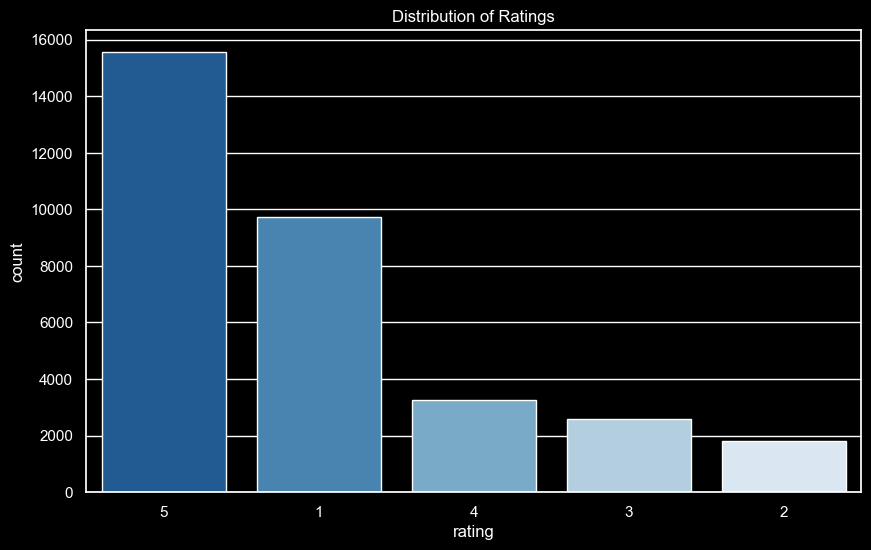

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette="Blues_r", order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

### Distribution of Sources

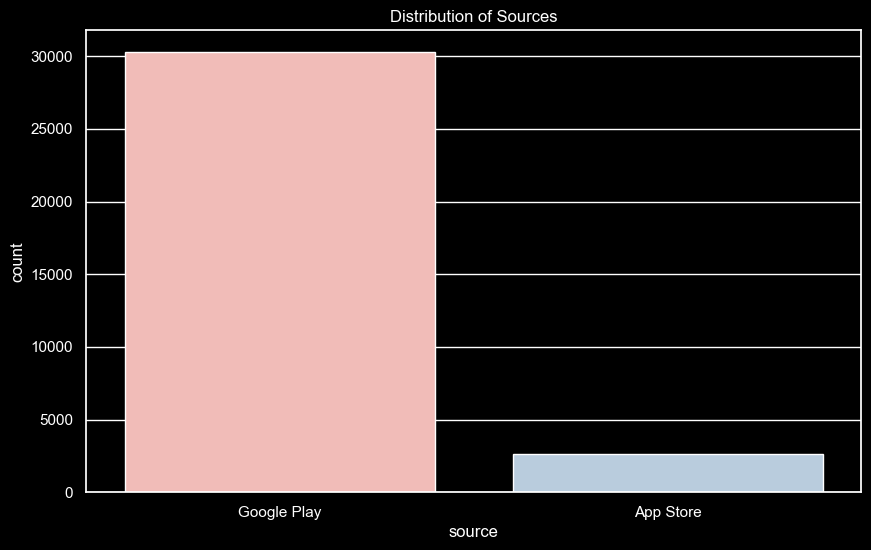

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='source', data=df, palette="Pastel1", order=df['source'].value_counts().index)
plt.title('Distribution of Sources')
plt.show()

### Sentiment Polarity by Rating

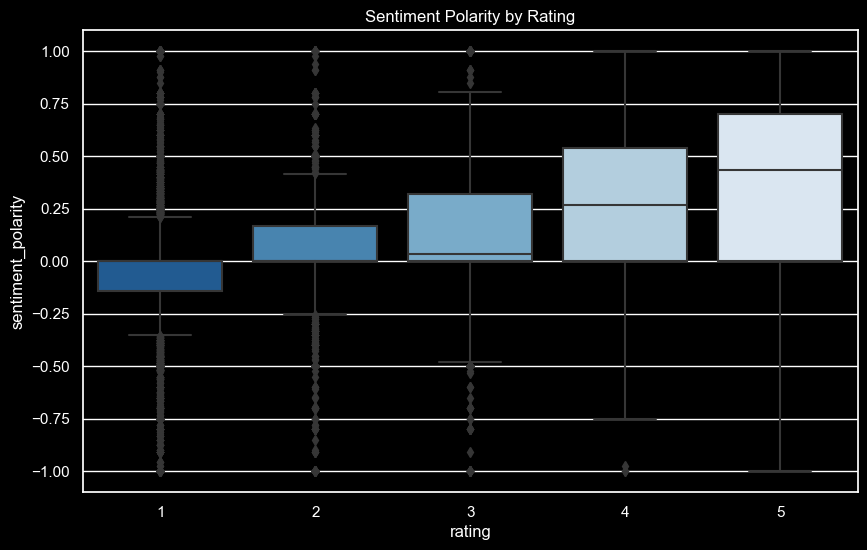

In [9]:
df['sentiment_polarity'] = df['review_description'].apply(lambda text: TextBlob(text).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='sentiment_polarity', data=df, palette="Blues_r")
plt.title('Sentiment Polarity by Rating')
plt.show()

### Word Frequency Analysis

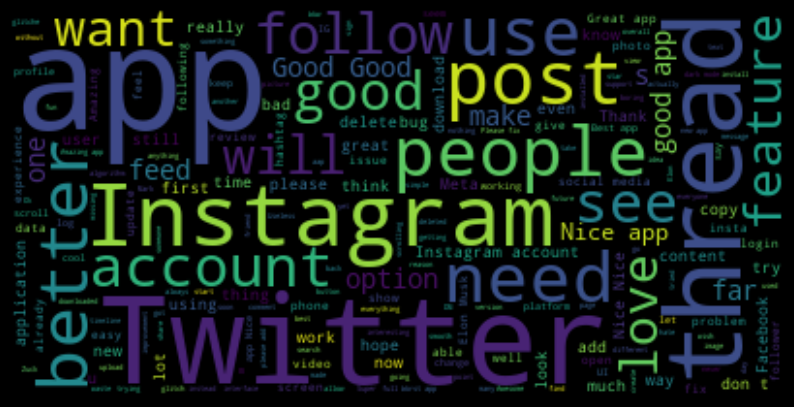

In [10]:
text = ' '.join(review for review in df['review_description'])
wordcloud = WordCloud(background_color='black').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusion


In the course of our exploratory data analysis, we thoroughly examined a dataset composed of app reviews. Our investigation covered the following key points:

1. Analysis of Review Ratings: Our findings showed that a large proportion of surveys received a score of 5, indicating a predominantly positive user response.

2. Examination of Review Sources: Most of the research was collected from Google Play, making it a primary source.

3. Assessment of Sentiment: The sentiment inferred from the review text was largely consistent with the given ratings. Reviews with higher ratings were linked to a more positive sentiment, while those with lower ratings reflected a more negative sentiment.